# Procesamiento de datos categóricos en Python

Vamos a aplicar en Python como sería el proceso de trabajar con variables categóricas para codificarlas numéricamente. Hay diferentes convenciones para el caso de **Pandas** y **Scikit Learn**.

El tema es métodos que nos permitan codificar variables categóricas en variables numéricas que después podamos trabajar en modelos de Machine Learning.

¿Hay casos que podemos tratar variables numéricas como si fueran categóricas?
Claro que se puede y la utilidad es que depende si aplica para el caso especifico o no.

## Encoding

|Categoría|Dummy|One-hot|
|---|---|---|
|ingles|[0,0]|[1,0,0]|
|español|[0,1]|[0,1,0]|
|frances|[1,0]|[0,0,1]|
|"nan"|?|[0,0,0]|

Tenemos 3 categorías [ingles, español, frances], aquí solo requerimos de un vector de **2** números para codificarlas.

Como se puede ver en la tabla, es una representación compacta, pero que sucede cuando entra otra categoría, con el método de encoding "Dummy" no hay posibilidad de meter otra categoría para representarla $\leftarrow$ esta es la debilidad del encoding "Dummy".

¿Qué pasa ahora con el "One-hot", lo que hacemos es: 
- voy a contar cuantas categorías tengo [3]
- entonces la longitud del vector es igual al número de categorías que tengo.
- Lo que vamos a decir es: siempre que aparezca un **1** en la primera posición es porque existe la categoría **ingles** y las demás categorías no están, entonces las hacemos **0**.
- Así sucesivamente, es la filosofía del one hot

¿Que pasa con las nuevas categorías? La va interpretar como $[0,0,0]$ así puede contemplar nuevas categorías.

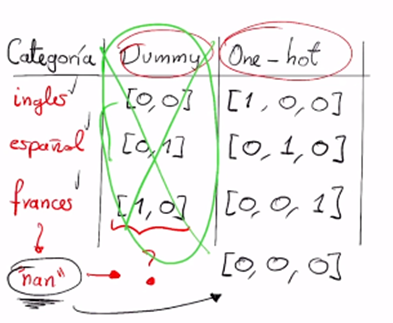

$\large{\text{El Dummy que vimos antes no existe en la librerías que vamos a ver}}$

In [2]:
import pandas as pd
df_cars=pd.read_csv('dataset/cars.csv')
df_cars.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [3]:
#Veamos que contiene la columna engine_type
df_cars['engine_type'].unique()

array(['gasoline', 'diesel', 'electric'], dtype=object)

Como se puede observar hay 3 categorías para 
```python
df_cars['engine_type']
```
Veamos como se hace le proceso de codificación con `get_dummies`de pandas

In [4]:
#Recordemos que no es el dummy anterior
pd.get_dummies(df_cars['engine_type'])

,diesel,electric,gasoline
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
38526,False,False,True
38527,True,False,False
38528,False,False,True
38529,False,False,True


Aquí como se puede ver crea el valor `True` solo se encuentra en la categoría que le corresponde, para lo demás pone `False`o **0**. Esto es un **One hot**.

## One hot en Scikit learn
Aquí vemos la documentación sobre el proceso de [codificar variables categóricas](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

In [5]:
import sklearn.preprocessing as preprocessing

#Voy a crear un método de codificación de variables de texto
encoder=preprocessing.OneHotEncoder(handle_unknown='ignore')

Aquí lo que hace:
```python
handle_unknown='ignore'
```
Me permite precisamente cuando lleguen valores que no están en la categorías contempladas y que yo necesite codificarlo, el puede codificarlo como un vector de $0's$. Ahora este **enconder** tengo que ajustarlo a las categorías de mi dataset, en mi caso lo ajustare para 'engine_type'.

In [6]:
#Ajustando el encoder a mis datos
encoder.fit(df_cars[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

Aquí el encoder ya quedo ajustado, ahora para que podamos ver el ajuste en las categorías, hare lo siguiente:

In [8]:
#recordando categorías
#Veamos que contiene la columna engine_type
df_cars['engine_type'].unique()

array(['gasoline', 'diesel', 'electric'], dtype=object)

In [7]:
#probamos con categoría inexistente
encoder.transform([['gasoline'],['diesel'],['electric'],['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

Entonces ajusta una categoría inexistente a un vector de ceros [0,0,0]. Ahora resolviendo la pregunta   
### ¿Nosotros podemos trabajar variables categóricas como si fueran numéricas?

In [9]:
# Trabajando variables numéricas como categóricas
# Depende del caso de uso, pero es util 

#Aplicando mi encoder a variable numérica
encoder.fit(df_cars[['year_produced']].values)

OneHotEncoder(handle_unknown='ignore')

Ahora hacemos una transformación

In [10]:
# Transformación de datos
encoder.transform([[2016],[2000],[1900]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Como se puede observar, crea diferentes $0's$ porque hay diferentes años en la columna `year_produced`, y en el caso de que no haya algún dato como en el caso `1900`, va a crear un arreglo de puros $0's$.

La desventaja de codificar en **One Hot** es la cantidad de símbolos a usar para cada combinación, eso afecta en el rendimiento, entonces gracias a esta razón y a la correlación uno debe buscar la **reducción de los datos**

## Extra:
[Problems with one-hot encoding ](https://www.quora.com/What-are-the-main-issues-with-using-one-hot-encoding)      
[One Hot encoding](https://interactivechaos.com/es/manual/tutorial-de-machine-learning/one-hot-encoding)    
[Pandas get.dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)